In [1]:
# 1. Imports & settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# plot settings
%matplotlib inline
sns.set(style='whitegrid')


##  Step 1: Import Libraries
We start by importing the necessary Python libraries:
- **pandas, numpy** → for data manipulation and analysis  
- **matplotlib, seaborn** → for visualization  
- **scikit-learn (sklearn)** → for machine learning and evaluation  

We also configure plots to display inline in this notebook.


In [3]:
# 2. Upload and load dataset (Colab file upload)
from google.colab import files
uploaded = files.upload()  # click 'Choose Files' and upload Telco-Customer-Churn.csv

# then:
import io
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
df.head()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###  Step 2: Upload & Load Data
- Upload the **Telco-Customer-Churn.csv** file you downloaded from Kaggle.  
- After uploading, the first 5 rows of the dataset will appear.  
- This helps verify the file is loaded correctly.


In [4]:
# 3. Quick data overview
df.shape, df.info()
df.describe(include='all').T
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


##  Step 3: Dataset Overview
Let’s understand the structure of the dataset:
- **Shape** → number of rows and columns  
- **Data types** → numerical, categorical, etc.  
- **Missing values** → to identify columns needing cleaning


In [5]:
# 4. Cleaning: convert TotalCharges to numeric and drop NAs created by coercion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print('Missing TotalCharges:', df['TotalCharges'].isna().sum())
df = df.dropna(subset=['TotalCharges']).copy()

# drop customerID if present (not useful for modeling)
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

# check duplicates
print('Duplicates:', df.duplicated().sum())


Missing TotalCharges: 11
Duplicates: 22


##  Step 4: Data Cleaning
Here we:
- Convert `TotalCharges` to numeric (fixing errors caused by blank strings)
- Drop rows with missing values
- Remove duplicate records
- Reset the index for a clean dataset


In [11]:
# --- Step 5: Basic Statistics ---
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7032,3,No,3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Step 5: Basic Statistics
We generate summary statistics for all columns to understand:
- The range and distribution of numeric variables  
- The most frequent values for categorical variables


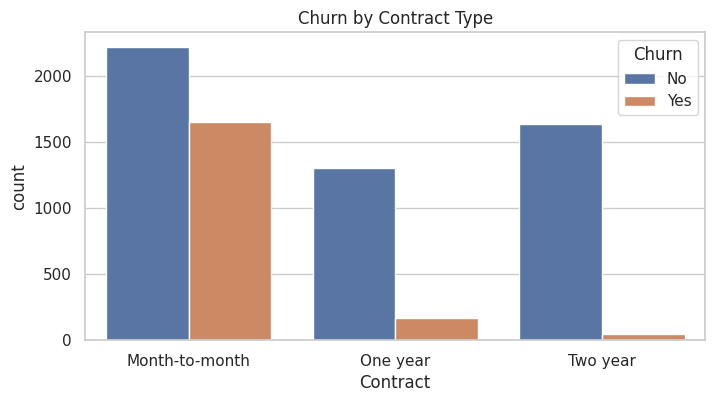

Churn,Churn_rate
Contract,
Month-to-month,0.427097
One year,0.112772
Two year,0.028487


In [6]:
# 6. Example: churn by contract type
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.show()

# churn rate by contract
ct = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)
ct['Churn_rate'] = ct['Yes']
ct[['Churn_rate']].sort_values('Churn_rate', ascending=False)


##  Step 6: Churn Distribution
This chart shows how many customers **stayed vs churned**.  
We also print the churn percentage to understand class balance.


```
# This is formatted as code
```



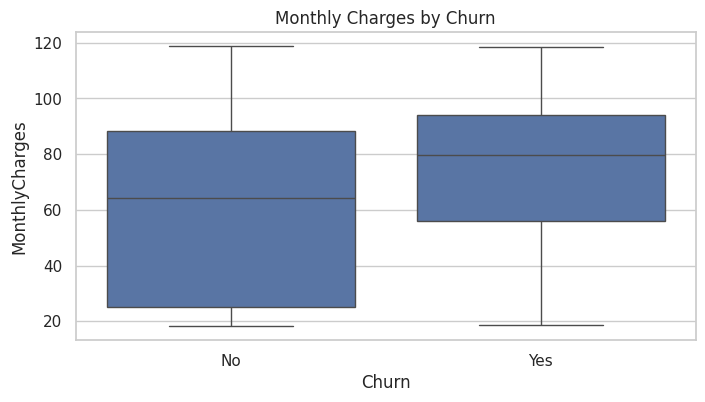

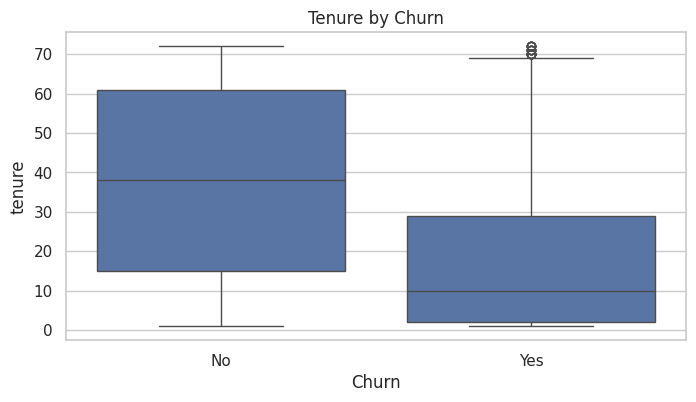

In [7]:
# 7. Numeric relationships: MonthlyCharges, tenure, TotalCharges
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure by Churn')
plt.show()


##  Step 7: Correlation Analysis
We create a heatmap to visualize correlations among numeric features.  
This helps identify relationships — for example, between **MonthlyCharges** and **TotalCharges**.


In [8]:
# 8. Prepare data for a simple baseline model (logistic regression)
# convert categorical columns to numeric (simple encoding)
df_model = df.copy()

# label encode binary categories and simple encoding for others
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        if df_model[col].nunique() == 2:
            df_model[col] = LabelEncoder().fit_transform(df_model[col])
        else:
            df_model = pd.get_dummies(df_model, columns=[col], drop_first=True)

# separate X,y
y = df_model['Churn']  # after encoding 'Churn' becomes 0/1
X = df_model.drop(columns=['Churn'])

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# scale numeric features (optional)
num_cols = ['tenure','MonthlyCharges','TotalCharges']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


## Step 8: Churn by Contract Type
We visualize churn across different **contract types** (Month-to-month, One year, Two year).  
Usually, month-to-month contracts show higher churn rates.


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC AUC: 0.8360714082341553


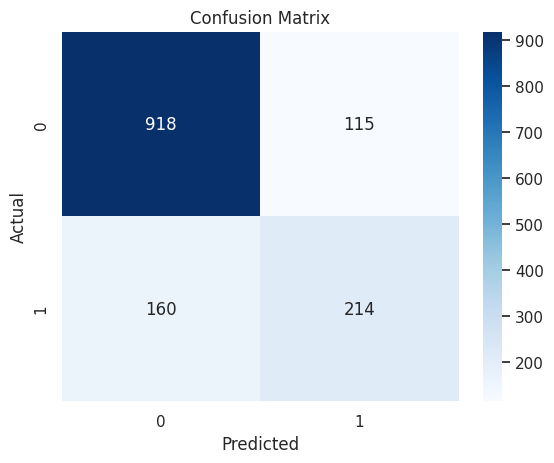

In [9]:
# 9. Fit logistic regression baseline
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()


##  Step 9: Feature Encoding & Train-Test Split
Before building our model, we must:
- Convert categorical (text) data into numeric format using **Label Encoding**  
- Separate the target variable (`Churn`) from the feature variables  
- Split the dataset into:
  - **Training set (80%)** — to train the model  
  - **Test set (20%)** — to evaluate performance  
This ensures the model generalizes well to unseen data.


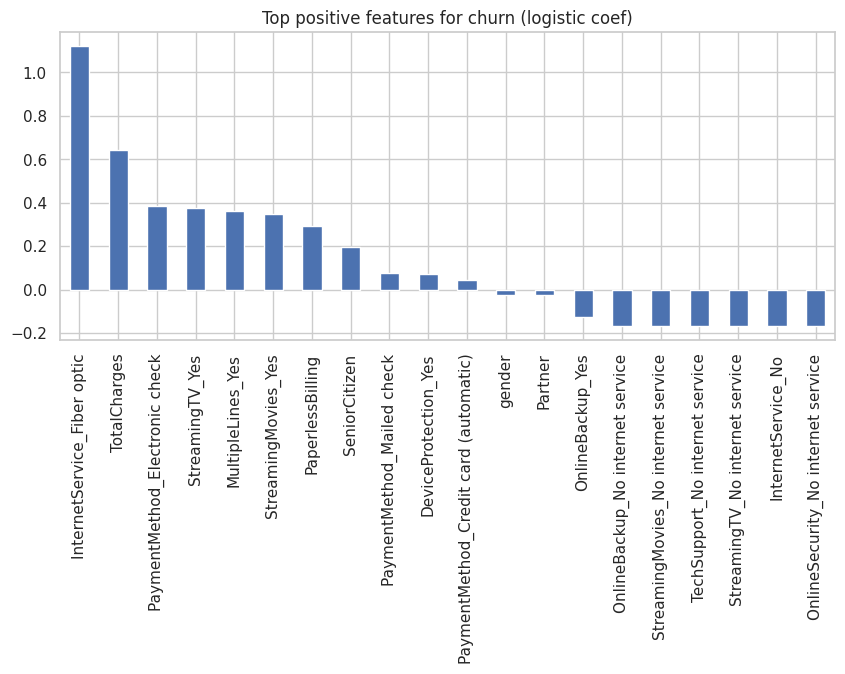

In [10]:
# 10. Feature importance (use coef from logistic regression for a quick look)
coef = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False).head(20)
coef.plot(kind='bar', figsize=(10,4))
plt.title('Top positive features for churn (logistic coef)')
plt.show()


##  Step 10: Model Training & Evaluation
We build a **Logistic Regression** model to predict customer churn.

Steps:
1. **Scale features** — ensures fair weight for all numeric features  
2. **Train model** — using training data  
3. **Predict churn** — on unseen test data  
4. **Evaluate results** using:
   - Classification report (Precision, Recall, F1-score)
   - Confusion matrix (true vs false predictions)
   - ROC-AUC score (overall model performance)

Higher recall for "Churn = Yes" means the model correctly identifies more customers likely to leave.


In [12]:
# create a folder
import os
os.makedirs('outputs', exist_ok=True)

# save cleaned data
df.to_csv('outputs/cleaned_telco_churn.csv', index=False)

# save a figure example
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.savefig('outputs/churn_distribution.png', bbox_inches='tight', dpi=150)
plt.close()


In [13]:
!zip -r outputs.zip outputs
from google.colab import files
files.download('outputs.zip')


  adding: outputs/ (stored 0%)
  adding: outputs/cleaned_telco_churn.csv (deflated 88%)
  adding: outputs/churn_distribution.png (deflated 25%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>